In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import rasterio as rio

c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
IMG_SIZE=22

In [3]:
# Read the preditive features and the label (Notflooded=0 , flooded=1)
data_path=r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features" # created in data_preperation script
CATEGORIES= ["NotFlooded", "Flooded"]

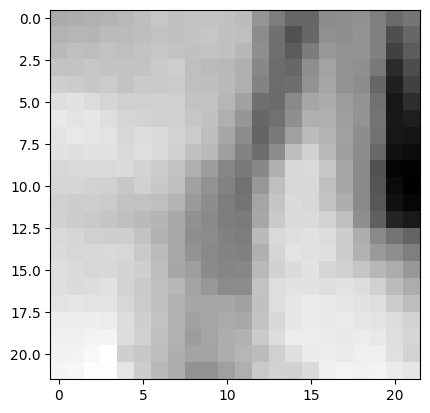

In [4]:
# Check the images
# plot the first band in the first image 
for category in CATEGORIES:
    path=os.path.join(data_path,category) # Path to flooded and NotFlooded dir
    for img in os.listdir(path):
        img_open=rio.open(os.path.join(path,img))
        img_array=img_open.read(1) # open the image and read the band
        img_array= np.where(img_array < 0, np.nan,img_array)
        mean=np.nanmean(img_array)
        img_array= np.where(np.isnan(img_array), mean,img_array)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        #print(img_array)
        break
    break

In [5]:
# Read the DEM and save it in a list

DEM=[]
Slope=[]
TWI=[]
DTRoad=[]
DTRiver=[]
CN=[]
Rain=[]
Aspect=[]
Curve=[]
Freq=[]
DTDrainage=[]
y=[]

predictive_features=[DEM, Slope, TWI, DTRoad, DTRiver, CN, Rain, Aspect, Curve, Freq, DTDrainage]


In [6]:
def create_training_data():
    for i in range(len(predictive_features)):
        print(i+1)
        for category in CATEGORIES:
            path= os.path.join(data_path,category) # Path to flooded and NotFlooded dir
            class_num= CATEGORIES.index(category)
            for img in os.listdir(path):
                try:
                    img_open=rio.open(os.path.join(path,img))
                    print(category,img,class_num)
                    img_array=img_open.read(i+1)
                    predictive_features[i].append(img_array)
                    
                    if i==0:
                        y.append(class_num)
                        #print(class_num)
                except Exception as e:
                    pass
create_training_data()

1
NotFlooded feature_feature_0.tif 0
NotFlooded feature_feature_1.tif 0
NotFlooded feature_feature_10.tif 0
NotFlooded feature_feature_11.tif 0
NotFlooded feature_feature_12.tif 0
NotFlooded feature_feature_13.tif 0
NotFlooded feature_feature_14.tif 0
NotFlooded feature_feature_15.tif 0
NotFlooded feature_feature_16.tif 0
NotFlooded feature_feature_17.tif 0
NotFlooded feature_feature_18.tif 0
NotFlooded feature_feature_19.tif 0
NotFlooded feature_feature_2.tif 0
NotFlooded feature_feature_20.tif 0
NotFlooded feature_feature_21.tif 0
NotFlooded feature_feature_22.tif 0
NotFlooded feature_feature_23.tif 0
NotFlooded feature_feature_24.tif 0
NotFlooded feature_feature_25.tif 0
NotFlooded feature_feature_26.tif 0
NotFlooded feature_feature_27.tif 0
NotFlooded feature_feature_28.tif 0
NotFlooded feature_feature_29.tif 0
NotFlooded feature_feature_3.tif 0
NotFlooded feature_feature_30.tif 0
NotFlooded feature_feature_31.tif 0
NotFlooded feature_feature_32.tif 0
NotFlooded feature_feature_33.

In [7]:
np.shape(DEM) # check image size

(84, 22, 22)

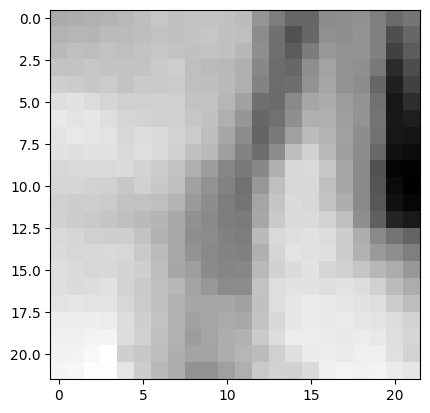

In [8]:
# plot the first image to check that the function is working
plt.imshow(DEM[0],cmap="gray")
plt.show()

In [9]:
# check the number of images 
len(DEM)

84

In [10]:
# convert the predictive feature lists to numpy arrays
DEM_array=np.array(DEM).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Slope_array=np.array(Slope).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
TWI_array=np.array(TWI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DTRoad_array=np.array(DTRoad).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DTRiver_array=np.array(DTRiver).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
CN_array=np.array(CN).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DTDrainage_array=np.array(DTDrainage).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Aspect_array=np.array(Aspect).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Curvature_array=np.array(Curve).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Freq_Curve_array=np.array(Freq).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Rain_array=np.array(Rain).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
# concatenate all the predicvtive feature arrays into one array
X_array=np.concatenate([DEM_array,Slope_array,TWI_array,DTRoad_array, DTRiver_array,CN_array,Rain_array,Aspect_array, Curvature_array, Freq_Curve_array, DTDrainage_array], axis=-1)

In [12]:
X_array.shape

(84, 22, 22, 11)

In [22]:
# split the data into training (60%), validation (20%) and testing (20%)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_array,y,test_size=0.2,random_state=101)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard

NAME = "LeNet"


model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (22,22,11)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#add a droupout
model.add(Dropout(0.4))

#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#add a droupout
model.add(Dropout(0.4))


#Flatten
model.add(Flatten())


#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))

#add a droupout
model.add(Dropout(0.4))


#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dropout(0.4))



#Layer 5
#Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("LeNet.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 18, 18, 6)         1656      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 6)          0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 9, 9, 6)           0         
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 2, 2, 16)         

In [24]:
type(y_train)

numpy.ndarray

In [27]:
history=model.fit(x_train ,y_train, batch_size=1024, epochs = 1000, validation_split=0.25, callbacks=[checkpoint,early,tensorboard])

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 82.7589 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 41.62851, saving model to LeNet.h5
1/1 [==============================] - 1s 1s/step - loss: 82.7589 - accuracy: 0.5000 - val_loss: 41.6285 - val_accuracy: 0.3529
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 69.0422 - accuracy: 0.5200
Epoch 2: val_loss improved from 41.62851 to 28.97464, saving model to LeNet.h5
1/1 [==============================] - 0s 103ms/step - loss: 69.0422 - accuracy: 0.5200 - val_loss: 28.9746 - val_accuracy: 0.3529
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 74.5960 - accuracy: 0.5800
Epoch 3: val_loss improved from 28.97464 to 16.42115, saving model to LeNet.h5
1/1 [==============================] - 0s 94ms/step - loss: 74.5960 - accuracy: 0.5800 - val_loss: 16.4212 - val_accuracy: 0.3529
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 57.0782 - accuracy: 0.4200

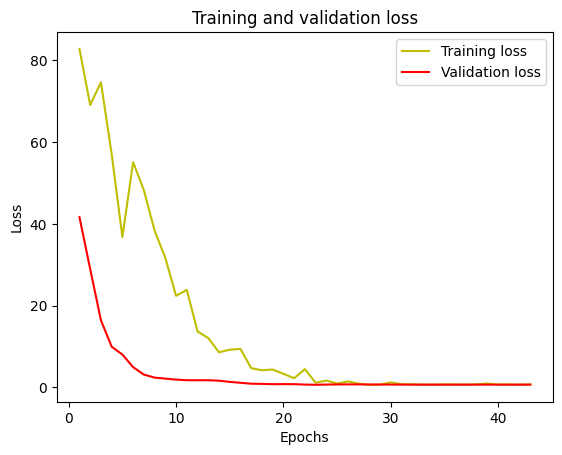

In [28]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

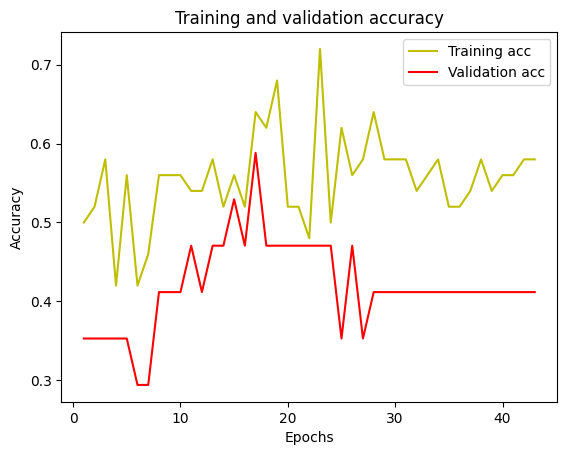

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 23ms/step - loss: 0.6894 - accuracy: 0.5882
Accuracy =  58.82353186607361 %


In [31]:
#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.5
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(x_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

1/1 [==============================] - 0s 105ms/step
[[10  0]
 [ 7  0]]


In [32]:
from sklearn.metrics import classification_report
target_names = ['NotFlooded', 'Flooded']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  NotFlooded       0.59      1.00      0.74        10
     Flooded       0.00      0.00      0.00         7

    accuracy                           0.59        17
   macro avg       0.29      0.50      0.37        17
weighted avg       0.35      0.59      0.44        17



c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred, labels=None, weights=None)


0.0

1/1 [==============================] - 0s 27ms/step


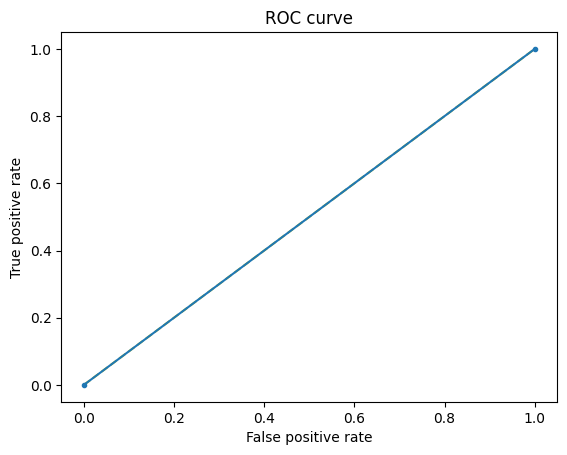

In [34]:
#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative. 
#ROC can help identify the right threshold.
#Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
#visualize the performance of a binary classifier when the threshold is varied. 
#ROC

from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [35]:
#One way to find the best threshold once we calculate the true positive 
#and false positive rates is ...
#The optimal cut off point would be where “true positive rate” is high 
#and the “false positive rate” is low. 
#Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)

import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

#Now use this threshold value in the confusion matrix to visualize the balance
#between tp, fp, fp, and fn


Ideal threshold is:  0    1.488739
Name: thresholds, dtype: float32


In [36]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.5
